In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt 
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.style as style
style.available
style.use('seaborn-dark') #sets the size of the charts
style.use('ggplot')

file = 'WikiArtClean.csv'

In [9]:
'''
index 0 = Style
index 1 = Category
index 2 = Artist
index 3 = Title
index 4 = Year
index 5 = Image URL
index 6 = Painting Info URL
index 7 = Artist Info URL
index 8 = Is painting
index 9 = Face or body
index 10 = Mean rating
index 11 = Agreeableness
index 12 = Anger
index 13 = Anticipation
index 14 = Arrogance
index 15 = Disagreeableness
index 16 = Disgust
index 17 = Fear
index 18 = Gratitude
index 19 = Happiness
index 20 = Humility
index 21 = Love
index 22 = Optimism
index 23 = Pessimism
index 24 = Regret
index 25 = Sadness
index 26 = Shame
index 27 = Shyness
index 28 = Surprise
index 29 = Trust
index 30 = Neutral
'''

'\nindex 0 = Style\nindex 1 = Category\nindex 2 = Artist\nindex 3 = Title\nindex 4 = Year\nindex 5 = Image URL\nindex 6 = Painting Info URL\nindex 7 = Artist Info URL\nindex 8 = Is painting\nindex 9 = Face or body\nindex 10 = Mean rating\nindex 11 = Agreeableness\nindex 12 = Anger\nindex 13 = Anticipation\nindex 14 = Arrogance\nindex 15 = Disagreeableness\nindex 16 = Disgust\nindex 17 = Fear\nindex 18 = Gratitude\nindex 19 = Happiness\nindex 20 = Humility\nindex 21 = Love\nindex 22 = Optimism\nindex 23 = Pessimism\nindex 24 = Regret\nindex 25 = Sadness\nindex 26 = Shame\nindex 27 = Shyness\nindex 28 = Surprise\nindex 29 = Trust\nindex 30 = Neutral\n'

### preprocess

In [43]:
face_body_proportion_d = defaultdict(list)
category_fraction_d = defaultdict(float)
artist_all_rating_d = defaultdict(list)
artist_rating_d = defaultdict(int)
titles = ''

def get_count(content):
    return content.count('face'), content.count('body'), content.count('none'), len(content)

with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for idx, row in enumerate(csv_reader):
        #print('{}\n'.format(row))
        if idx != 0:
            category = row[1]
            face_or_body = row[9]
            face_body_proportion_d[category].append(face_or_body)

            artist = row[2]
            rating = float(row[10])
            artist_all_rating_d[artist].append(rating)
            
            tmp = str(row[3]) + ' '
            titles += tmp
        

print('{} categories in total'.format(len(face_body_proportion_d)))
for key, item in face_body_proportion_d.items():
    face, body, non, total = get_count(item)
    fraction = round(face/total, 3)

    category_fraction_d[key] = fraction
    #print('category: {}, face: {}, body: {}, none: {}, total: {}, fraction: {}'.format(key, face, body, non, total, fraction))

print('{} artists in total'.format(len(artist_all_rating_d)))
for key, item in artist_all_rating_d.items():
    avg_rating = np.mean(item)
    artist_rating_d[key] = avg_rating
    #print('artist: {}, average rating: {}'.format(key, avg_rating))

44 categories in total
986 artists in total


### face / (body + face) proportion

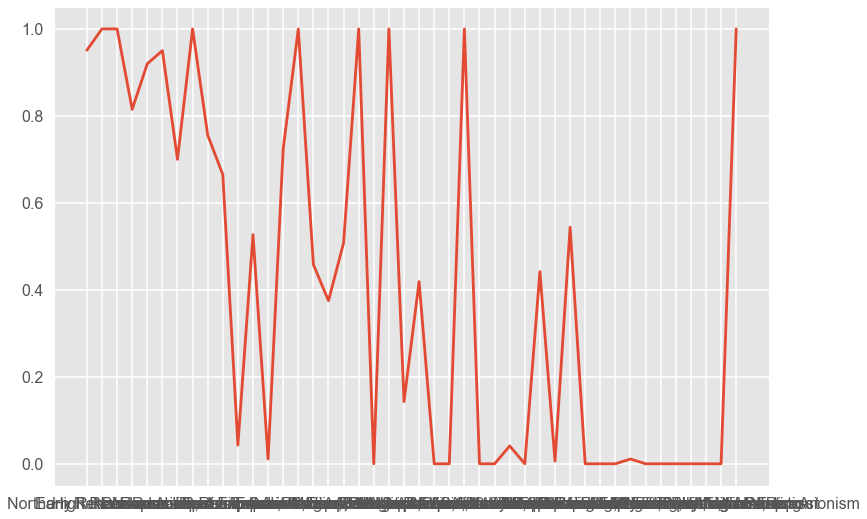

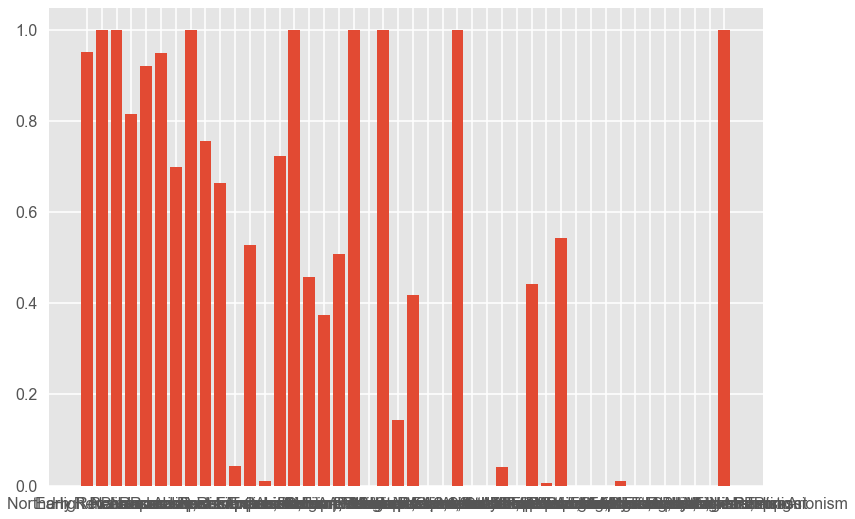

In [54]:
plt.plot(list(category_fraction_d.keys()), list(category_fraction_d.values()))
plt.show()

plt.bar(list(category_fraction_d.keys()), list(category_fraction_d.values()))
plt.show()

### artist and their average ratings

/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/analysis/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0, flags=flags)


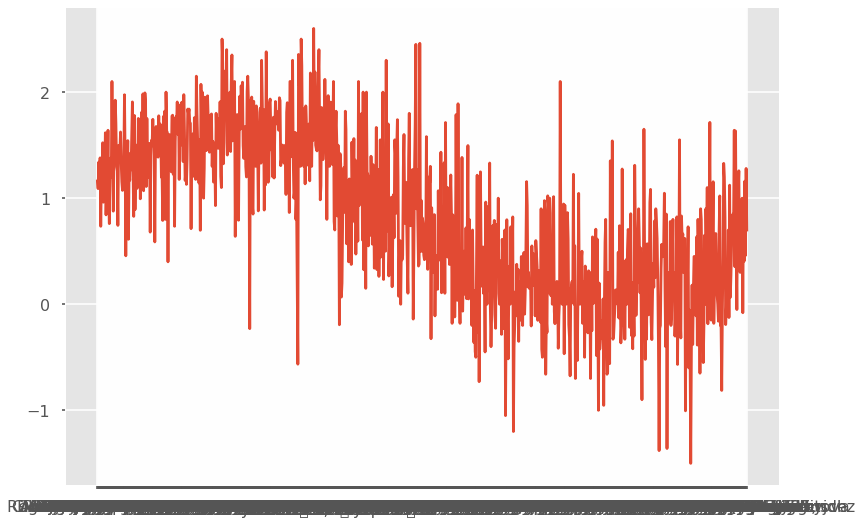

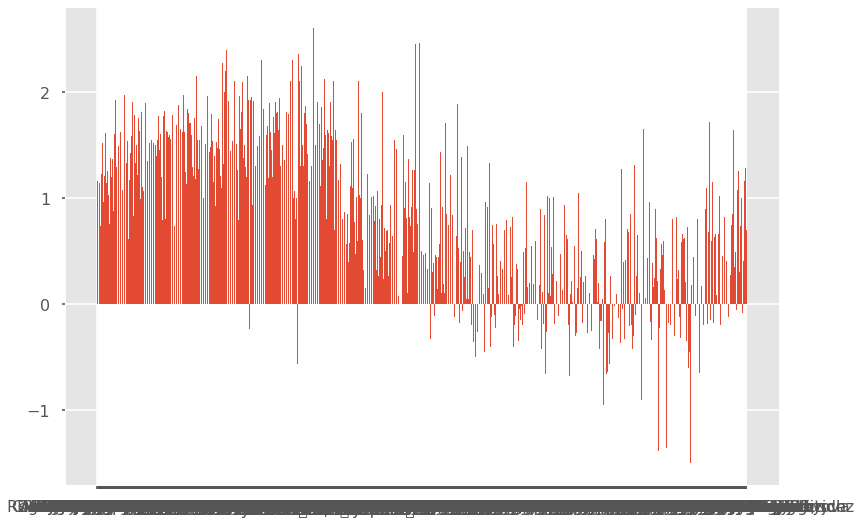

In [52]:
plt.plot(list(artist_rating_d.keys()), list(artist_rating_d.values()))
plt.show()

plt.bar(list(artist_rating_d.keys()), list(artist_rating_d.values()))
plt.show()

### word cloud of all titles

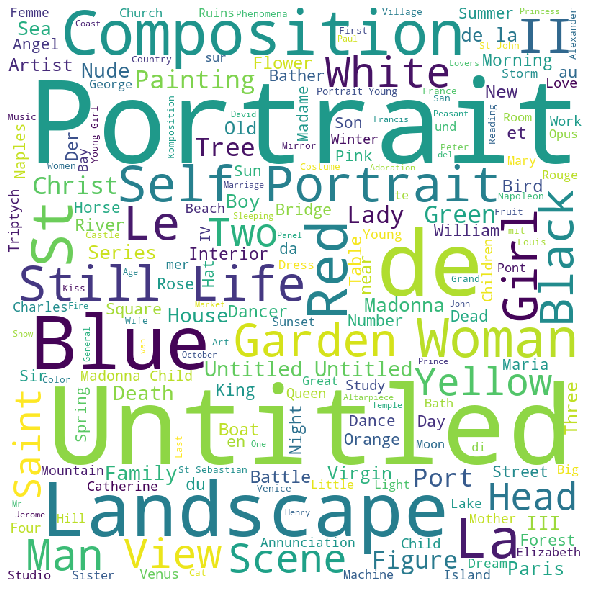

In [42]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width=800, 
                      height=800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(titles) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 